<a href="https://colab.research.google.com/github/Rogerio-mack/Deep-Learning-I/blob/main/T7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Inteligência Artificial</b></font></h1> 
<h1 align=left><font size = 6, style="color:rgb(0,0,0)"><b>Deep Learning</b></font></h1> 

# 7. Modelos Autoencoder
Professor(a): Rogério de Oliveira

<br>
<br>

---


# Introdução

Todos os modelos que você viu até aqui foram modelos de aprendizado supervisionado. Existe, entretanto, uma série de modelos neurais e de deep learning não supervisionados (ou ainda auto-supervisionados), empregados para geração de imagens, eliminação de ruído, combinação de imagens etc. Esses modelos incluem:

- Autoencoders
- Autoencoders Variacionais (VAEs) 
- Redes Adversariais Generativas (GANs)

Aqui você vai aprender um pouco sobre os dois primeiros modelos.

# O que são Autoencoders?

Os Autoencoders são uma técnica de aprendizado não supervisionado, na qual usamos as redes neurais para a tarefa de *aprendizado de representação*. Se os recursos de entrada fossem independentes um do outro, essa reconstrução subsequente seria uma tarefa muito difícil. Esperamos, entretanto, uma certa estrutura nos dados, ou um padrão, dado pelas correlações entre os recursos de entrada. É essa estrutura que pode ser aprendida.

De modo simples, Autoencoders (AE) são redes neurais que copiam suas entradas para suas saídas. Eles trabalham compactando ou espandindo a entrada em uma representação de espaço latente e, em seguida, reconstruindo a saída dessa representação. Assim a rede é composta de duas partes:

> **Codificador (Encoder)**: é a parte da rede que codifica a entrada em uma representação de espaço latente. Esse espaço pode ser maior ou menor, expandindo ou compactando a representação, e podemos representá-la por $h = f (x)$.

> **Decodificador (Decoder)**: Esta parte reconstrui a entrada a partir da  representação do espaço latente $r = g (h)$.

<img src="http://meusite.mackenzie.br/rogerio/DLA2021S1/autoencoder1.png" width=700, align="center"> 

Em uma arquitetura comum, o Autoencoder é uma rede feedforward em que a camada final de encode é uma camada de dimensão menor. 

Mas existem muitas ou outras arquiteturas, podendo haver mais camadas, o encode ter um espaço latente de maior que a entrada ou ainda empregarmos redes convolucionais nas camadas.

<img src="http://meusite.mackenzie.br/rogerio/DLA2021S1/autoencoder7.png" width=500, align="center"> 

# Aplicações

Algumas das aplicações dos autoencoders são:

- Redução de dimensionalidade
- Remoção de ruído
- Composição de imagens
- Criação de imagens (VAEs)

Havendo ainda outras aplicações no contexto de imagens e linguagem natural. Mas boa parte da atenção voltada para esses modelos é que eles são considerados uma via potencial para resolver o problema da aprendizagem não supervisionada, ou seja, a aprendizagem de representações úteis sem a necessidade de rótulos prévios (veja a sugestão de leitura do texto
[Building High-level Features
Using Large Scale Unsupervised Learning](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/38115.pdf) ao final desta trilha).

# Redução de Dimensionalidade 

Com as restrições de dimensionalidade e esparsidade apropriadas, os codificadores automáticos podem aprender projeções de dados que são mais interessantes do que o PCA assim como outras técnicas.

A ideia é que o encoder consolida as *features* dos dados *preservando* a sua distribuição e podermos então empregar a saída do encoder treinado para uma série de aplicações práticas como empregar esse **embedding** para modelos tradicionais de aprendizado supervisionado (SVM, random forest, NN etc.), clusterização e  visualização (***t-SNE***, EDA) e grandes volumes de dados e *transfer learning*.

$\rightarrow$ *Os autoencoders, embora sejam algoritmos de 'compressão' de dados, não devem ser empregados para compactação de imagens! Eles não são compactadores de imagem de uso geral  e técnicas de compactação como JPEG são muito melhores.*



<img src="http://meusite.mackenzie.br/rogerio/DLA2021S1/autoencoder2.png" width=700, align="center"> 



E para obter essas features extraídas você pode empregar apenas uma parte, o encode, da sua rede!

<img src="http://meusite.mackenzie.br/rogerio/DLA2021S1/autoencoder8.png" width=300, align="center"> 

# Isso não é um PCA?

Uma questão que normalmente surge é por que empregar um Autoencoder e não um PCA? E aqui você pode achar útil acessar [PCA](https://setosa.io/ev/principal-component-analysis/) e [A layman's introduction to principal component analysis](https://www.youtube.com/watch?v=BfTMmoDFXyE) para uma intuição e para relembra o quê é a técnicas de PCA (Principal Component Analysis).

A principal razão para o uso dos Autoencoders, é que os Autoencoders permitem fazer uma representação em que as features do espaço latente não são necessariamente ortogonais o quê, muitas vezes, pode ser uma representação muito melhor dos dados.


# Redução de Ruído

Aqui o treinamento é realizado adicionando-se ruído nas entradas e você verá uma aplicação disso com PyTorch.

<img src="http://meusite.mackenzie.br/rogerio/DLA2021S1/autoencoder6.png" width=700, align="center"> 

# Composição de imagens

De modo semelhante a redução de ruído, os autoencoders podem permitir a colorização de imagens e a remoção de marcas d'água, textos e outros aspectos de combinação de imagens (ou adicioná-las).

<img src="http://meusite.mackenzie.br/rogerio/DLA2021S1/autoencoder4.png" width=700, align="center"> 

<img src="http://meusite.mackenzie.br/rogerio/DLA2021S1/autoencoder3.png" width=700, align="center"> 

# Criação de imagens (VAEs)

Os codificadores automáticos são treinados para preservar o máximo de informações possível quando uma entrada é executada pelo encoder e, em seguida, pelodecode, mas também são treinados para fazer com que a nova representação tenha várias propriedades interessantes (outro aspecto que não podemos obter com o PCA).

Os Autoencoders Variacionais (VAEs) permitem, assim, produzir **novos casos** que preservam as mesmas características dos casos originais. Você vai ver também um exemplo simples disso com `Pytorch`. Para essa última aplicação, entretanto, os modelos recentes de Adversarial Neural Networks, também modelos não supervisionados, vem sendo mais aplicados. 



<img src="http://meusite.mackenzie.br/rogerio/DLA2021S1/autoencoder5.png" width=700, align="center"> 

# Exemplo PyTorch

Autoencoders são muito mais úteis quando tratamos dados com alta dimensionalidade como imagens, vídeo ou linguagem natural e que trataremos na componente Deep Learning para Processamento de Linguagem e Visão. Imagens em geral são representadas por uma ou mais matrizes de pixels (ver a trilha  3. Tensores, GPU, AutoGrad e Grafos de Execução) e são melhor tratadas empregando camadas convolucionais de rede. Mas podemos aqui empregar um conjunto simples de dígitos [*THE MNIST DATABASE of handwritten digits*](http://yann.lecun.com/exdb/mnist/) representando-os como vetores, e implementar um modelo sequencial de Autoencoder com camadas lineares do `PyTorch` que já conhecemos. 

Vamos aqui implementar um Autoencoder com camadas lineares com `PyTorch` para a tarefa de Supressão de ruído em imagens dos dígitos. 

Um exemplo similar em `TensorFlow` para a parte de eliminação de ruído pode ser obtida [aqui](https://github.com/rasbt/stat479-deep-learning-ss19/blob/master/L15_autoencoder/code/ae-simple.ipynb)

# Importando o PyTorch e os dados de MNIST

Não nos deteremos aqui sobre os detalhes da aquisição dos dados e as transformações realizadas. Isso será importante mais adiante quando tratarmos  Processamento de Linguagem e Visão. Aqui basta você observar que empregamos as classes `Datasets`, `DataLoader` (e o módulo `transform`, veja seção Para saber Mais da trilha anterior) para a aquisição dos dados. As imagens são matrizes de pixels $28 \times 28$, que são normalizadas e organizadas em lotes de 64 imagens para o aprendizado. Note ainda que os labels (a classe das imagens, o quê corresponde aos dígitos 0, 1, 2...) podem ser ignorados já que não serão empregados: nosso aprendizado aqui é não supervisionado!

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transform
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
import math

batch_size = 64
img_transform = transform.Compose([transform.ToTensor(), transform.Normalize((0.5,),(0.5,))]) 

train_set = torchvision.datasets.MNIST(root = '../../data', train= True, transform= img_transform, download= True)
test_set = torchvision.datasets.MNIST(root = '../../data', train= False, transform= img_transform, download= True)

img, _ = train_set[0] # ignorando os labels

train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)



Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw

Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!




Você pode observar uma tupla individual do conjunto de treinamento ou de um lote:

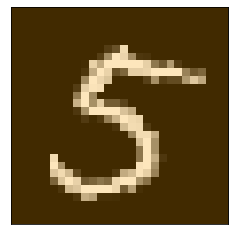

torch.Size([1, 28, 28])


In [10]:
def Show(out):

  # decorations... rs
  ax = plt.axes()
  ax.set(facecolor = "orange")

  grid = torchvision.utils.make_grid(out)
  plt.imshow(transform.ToPILImage()(grid),alpha=0.75)

  # decorations... rs
  plt.xticks([])
  plt.yticks([])
  plt.show()

digito = next(iter(train_loader))[0][0]
Show(digito)
print(digito.shape)


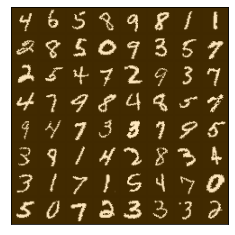

torch.Size([64, 1, 28, 28])


In [11]:
lote = next(iter(train_loader))[0] 
Show(lote)
print(lote.shape)

Você pode achar útil recordar o que vimos na trilha 3. Tensores, GPU, AutoGrad e Grafos de Execução,

<table>
<tr>
<th>Typical axis order</th>
</tr>
<tr>
    <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/shape2.png?raw=1" alt="Keep track of what each axis is. A 4-axis tensor might be: Batch, Width, Height, Features">
  </td>
</tr>
</table>

# Definição do Modelo

Nós vamos estender a classe `Module` em três classes: `Encoder`, `Decoder` e `Autoencoder` uma vez que podemos empregar cada uma delas de modo independente.

Só empregamos aqui camadas lineares a camada de entrada tem portanto $28 \times 28$ elementos correspondendo a cada pixel das imagens. A saída é uma saída de 7 elementos que corresponde ao tamanho do espaço latente ou a redução de dimensão que estaremos fazendo.

$$ 28 \times 28 \text{    size}  \rightarrow \text{    Encoder} \rightarrow 7 \text{    size} \rightarrow \text{    Decoder} \rightarrow 28 \times 28 \text{    size}$$

$$ \text{Imagem COM Ruído}  \rightarrow \text{Imagem SEM Ruído}$$


A entrada do Encoder não será exatamente uma matriz de pixels, mas a matriz linearizada em um vetor de $ 28 \times 28 = 784 $ elementos. Não há necessidade de termos um valor de saída representando a probabilidade de uma classe e podemos empregar neste caso a função `relu` também na camada de saída. A classe Autoencoder é simplesmente uma chamada das classes anteriores.

In [13]:
class Encoder(nn.Module):
  def __init__(self):
    super(Encoder,self).__init__()
    self.f1 = nn.Linear(28*28,196)
    self.f2 = nn.Linear(196,49)
    self.f3 = nn.Linear(49,7)

  def forward(self, image):
    out = F.relu(self.f1(image))
    out = F.relu(self.f2(out))
    z = F.relu(self.f3(out))
    return z

class Decoder(nn.Module):
  def __init__(self):
    super(Decoder,self).__init__()
    self.f1 = nn.Linear(7,49)
    self.f2 = nn.Linear(49,196)
    self.f3 = nn.Linear(196,28*28)

  def forward(self, z):
    out = F.relu(self.f1(z))
    out = F.relu(self.f2(out))
    out = torch.tanh(self.f3(out))
    return out
 
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder,self).__init__()
    self.Encoder = Encoder()
    self.Decoder = Decoder()

  def forward(self, image):
    z = self.Encoder(image)
    out =  self.Decoder(z)
    return out    


# Treinamento

Aqui estamos treinando um modelo para supressão de ruído. Essa etapa irá mudar de acordo com a tarefa para que estamos empregando o Autoencoder.



## Conjuntos `X_train` e `y_train`? 

Para essa tarefa nosso conjunto de entrada `X_train` será a imagem adicionada de ruído e vamo treinar o modelo para produzir a saída `y_train` da imagem original. Por esse motivo muitas vezes também chamamos esses modelos de *auto-aprendizado*. Para criar esses conjuntos de dados  o código abaixo fará a *preparação* de cada lote de dados, linearizando a matriz das imagens, enviando-as para o dispositivo e adicionando ruído à imagem original.

```
          # Preparação dos dados
          img_original = img.view(img.size(0),-1).to(device) # reshape e envio para o dispositivo
          img = img + torch.randn(img.size()) * 0.01 + 0.1   # adiciona ruído
          img = img.view(img.size(0),-1)                     # reshape
          img = img.to(device)                               # envio para o dispositivo
```

A adição de ruído está fixa no código e você pode alterar o código para experimentar outras taxas de ruído, maiores ou menores. 

As demais etapas do treinamento seguem o que você já viu na trilha anterior com a avaliação da função de custo, a recuperação dos gradientes e o ajuste dos parâmetros da rede.


In [14]:
def train(model, train_loader, Epochs, loss_fn):
    train_loss_avg = []
    for epoch in range(Epochs):
      train_loss_avg.append(0)
      num_batches = 0
    
      for img, _ in train_loader:

          # Preparação dos dados
          img_original = img.view(img.size(0),-1).to(device) # reshape e envio para o dispositivo
          img = img + torch.randn(img.size()) * 0.01 + 0.1   # adiciona ruído
          img = img.view(img.size(0),-1)                     # reshape
          img = img.to(device)                               # envio para o dispositivo

          img_recon = model(img)

          loss = loss_fn(img_recon, img_original)
          
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          
          train_loss_avg[-1] += loss.item()
          num_batches += 1
          
      train_loss_avg[-1] /= num_batches
      print('Epoch [%d / %d] average reconstruction error: %f' % (epoch+1, Epochs, train_loss_avg[-1]))
    return train_loss_avg

## Executando o Treinamento

Vamos empregar o MSELoss (*mean square error*) como função de custo e o otimizador Adam, funções que você já conhece.

$\rightarrow$ *Esta operação pode levar alguns minutos...*



In [15]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

learning_rate = 0.001
autoencoder = Autoencoder()
autoencoder.to(device)
loss = nn.MSELoss()
optimizer = torch.optim.Adam(params=autoencoder.parameters(), lr=learning_rate, weight_decay=1e-5)
autoencoder.train()
loss_values = train(autoencoder, train_loader, 10, loss) # use 20



Epoch [1 / 10] average reconstruction error: 0.167605
Epoch [2 / 10] average reconstruction error: 0.118413
Epoch [3 / 10] average reconstruction error: 0.109517
Epoch [4 / 10] average reconstruction error: 0.104465
Epoch [5 / 10] average reconstruction error: 0.101107
Epoch [6 / 10] average reconstruction error: 0.098689
Epoch [7 / 10] average reconstruction error: 0.096810
Epoch [8 / 10] average reconstruction error: 0.095346
Epoch [9 / 10] average reconstruction error: 0.094154
Epoch [10 / 10] average reconstruction error: 0.093151


# Inspecionando os resultados

O resultado do treinamento você pode observar abaixo pela evolução da curva de aprendizado da rede.

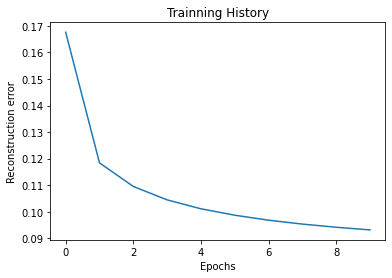

In [16]:
fig = plt.figure()
plt.plot(loss_values)
plt.xlabel('Epochs')
plt.ylabel('Reconstruction error')
plt.title('Trainning History')
plt.show()

Mas o mais interessante é ver se nosso modelo de fato faz aquilo a que se propõe que é receber imagens com ruído e reconstruir imagens corretas.

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1])
Entradas


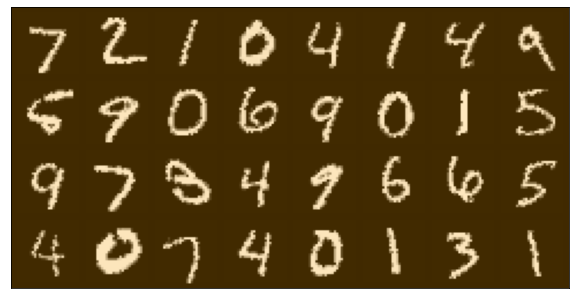

Entradas com Ruído


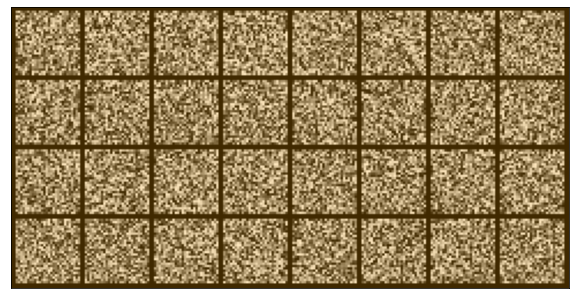

Saída Reconstruída


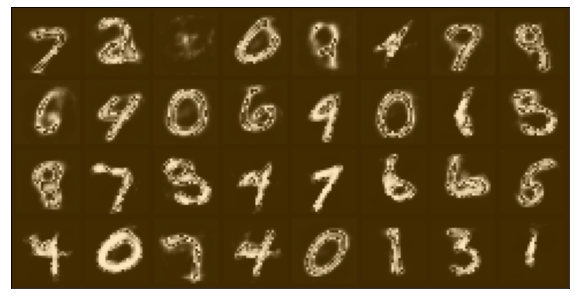

In [17]:
with torch.no_grad():

  image1,label = iter(test_loader).next()   
  print(label[0:32])
  image = image1 + torch.randn(image1.size()) * 1.9 + 0.1
  
  image = image.to(device)
  image = image.view(image.size(0),-1)
  saida = autoencoder(image)
  saida = saida.view(saida.size(0),1,28,28)
  
  print("Entradas")
  image1 = image1.view(image1.size(0),1,28,28)
  fig, ax = plt.subplots(figsize=(10, 10))
  Show(image1[0:32])
  plt.show()
    
  print("Entradas com Ruído")
  image = image.view(image.size(0),1,28,28)
  fig, ax = plt.subplots(figsize=(10, 10))
  Show(image[0:32])
  plt.show()

  print("Saída Reconstruída")
  fig, ax = plt.subplots(figsize=(10, 10))
  Show(saida[0:32])
  plt.show()

Como você pode ver apenas algumas imagens não são reproduzidas corretamente. Mas você pode também observar que o nível de ruído das imagens é bastante grande e *nenhum* dos dígitos seria reconhecido por qualquer um de nós com esse nível de ruído. Talvez você ache interessante e você pode criar imagens com menos ruído aqui e, então, verificar que o nível de acerto será bastante maior mesmo em casos em que você não irá reconhecer os dígitos. 

# Síntese

Nesta trilha você aprendeu como construir um primeiro modelo *não supervisado* de rede profunda. Os modelos Autoencoder têm uma série de aplicações práticas principalmente no contexto de tratamento de imagens e linguagem natural como:

- Redução de dimensionalidade
- Remoção de ruído
- Composição de imagens
- Criação de imagens (VAEs)

Mas seu principal valor parece residir no seu uso potencial para problemas de aprendizado não supervisionado o que ainda está em desenvolvimento. 


## Para saber mais

Acesse [Building High-level Features
Using Large Scale Unsupervised Learning](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/38115.pdf), este é um texto clássico da capacidade de modelos Autoencoders identificar e consolidar as features de um grande conjunto de dados sem a necessidade de rótulos prévios.

Veja implementações semelhantes a implementação do Autoencoder feita aqui com `TensorFlow` em:

* **Machine Learning Concepts**, https://sci2lab.github.io/ml_tutorial//, Autoencoders, 
https://sci2lab.github.io/ml_tutorial/autoencoder/index.html#

* https://github.com/rasbt/stat479-deep-learning-ss19/blob/master/L15_autoencoder/code/ae-simple.ipynb

Conheça mais sobre os Autoencoders Variacionais em **Comprehensive Introduction to Autoencoders**, Matthew Stewart, em https://towardsdatascience.com/generating-images-with-autoencoders-77fd3a8dd368 ou **Variational Autoencoder Demystified With PyTorch Implementation**, em https://towardsdatascience.com/variational-autoencoder-demystified-with-pytorch-implementation-3a06bee395ed



## Referências

1. ___. **Building Autoencoders in Keras**. Disponível em: https://blog.keras.io/building-autoencoders-in-keras.html/ Acesso em: 11 de junho de 2021.

1. Géron, A. **Hands-on machine learning with Scikit-Learn, Keras and TensorFlow: concepts, tools, and techniques to build intelligent systems**, 2nd ed. (2019) O'Reilly 

1. Aston Zhang and Zachary C. Lipton and Mu Li and Alexander J. Smola. **Dive into Deep Learning** (2020). Disponível em: https://d2l.ai/index.html Acesso em: 21 de abril de 2021. 

1. ___. **Machine Learning Concepts**, Disponível em: https://sci2lab.github.io/ml_tutorial//, Autoencoders, Disponível em:  
https://sci2lab.github.io/ml_tutorial/autoencoder/index.html#
Acesso em: 11 de junho de 2021.


